<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 5
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Импорт необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, silhouette_score
from sklearn.metrics import silhouette_samples, precision_recall_curve, auc
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Задание №1:

Найти и подготовить данные для задачи классификации
*   Найдите набор данных для решения задачи классификации или регрессии. Данные не должны повторяться между участниками группы.
*   Подготовьте данные для анализа: проверьте их на наличие пропусков, выбросов и при необходимости произведите очистку данных.

In [ ]:
# Загрузка данных
data = pd.read_csv('diabetes_dataset.csv')
# Просмотр данных
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Удаление повторяющихся строк
data = data.drop_duplicates()

# Нормализация для Min-Max Scaling
scaler = MinMaxScaler()
data =  pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print('Размерность данных:', data.shape, end='\n\n')
data.head()

Размерность данных: (768, 9)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [ ]:
# Определение целевого столбца
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Задание №2:

Построить дерево решений

*   Реализуйте дерево решений для задачи классификации или регрессии с использованием библиотеки scikit-learn.
*   Проведите обучение модели на ваших данных.

Accuracy: 0.79 



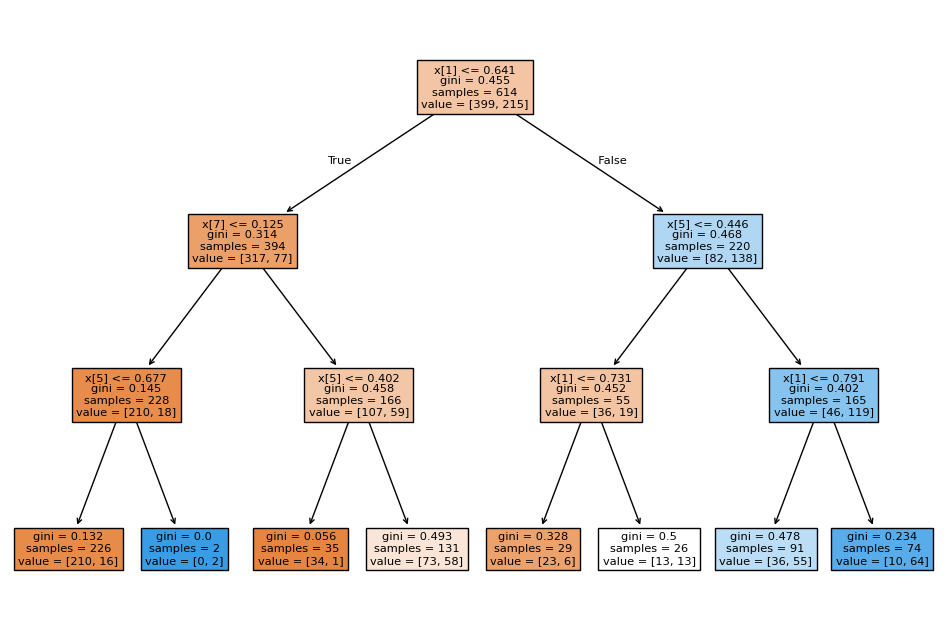

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2), '\n')
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True)
plt.show()

## Задание №3:

Подобрать гиперпараметры дерева решений

In [ ]:
dt = DecisionTreeClassifier()

# Определение сетки гиперпараметров
param_grid = {
'max_depth': [2, 3, 4, 5, 6],
'min_samples_split': [2, 3, 4, 5],
'min_samples_leaf': [2, 3, 4, 5],
'criterion': ['entropy', 'gini']
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
# Обучение и подбор гиперпараметров
grid_search.fit(X_train, y_train)
# Лучшие гиперпараметры
print("Лучшие параметры:", grid_search.best_params_)
# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
print("Точность на тестовых данных:", best_model.score(X_test, y_test))

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Точность на тестовых данных: 0.7012987012987013


Accuracy: 0.79 



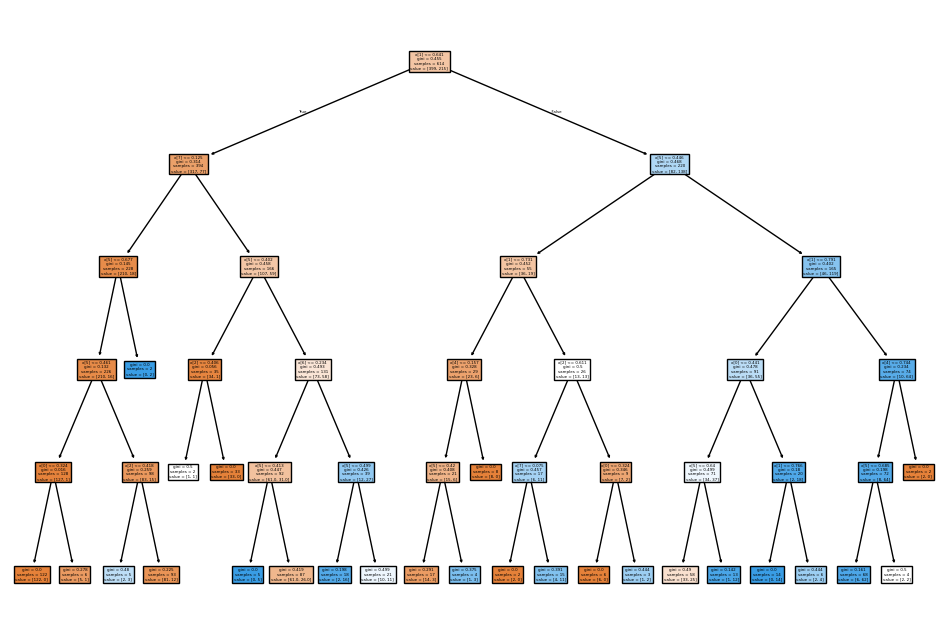

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2, criterion='gini')
clf.fit(X_train, y_train)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2), '\n')
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True)
plt.show()

## Задание №4:

Реализуйте следующие ансамбли моделей:
*   Бэггинг (bagging)
*   Бустинг (например, с помощью XGBoost, CatBoost или LightGBM)
*   Стекинг (stacking)
*   Обучите ансамбли на тех же данных и сравните их с результатами дерева решений.

In [ ]:
# Bagging

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Оценка точности
accuracy = rf.score(X_test, y_test)

In [ ]:
# XGBoost

xg_clf = xgb.XGBClassifier(n_estimators=100, seed=42)
xg_clf.fit(X_train, y_train)
# Оценка точности
accuracy = xg_clf.score(X_test, y_test)

In [ ]:
# Определение базовых моделей

base_estimators = [
('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
]
# Метамодель
final_estimator = LogisticRegression()
# Создание стекинг-классификатора
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)
# Обучение и оценка модели
stacking_clf.fit(X_train, y_train)
accuracy = stacking_clf.score(X_test, y_test)

## Задание №5:

Оценить качество моделей:
*   Оцените качество ансамблей моделей с использованием
метрик, аналогичных тем, что использовались для дерева решений.
*   Сравните производительность различных ансамблей с базовой моделью дерева решений и сделайте выводы, какая модель лучше решает задачу.

In [ ]:
def count_metric(X_test, y_test, model):
    # Предсказания модели
    y_pred = model.predict(X_test)
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Точность:", accuracy)
    print("Точность (Precision):", precision)
    print("Полнота (Recall):", recall)
    print("F1-score:", f1)
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    print("Матрица ошибок:\n", cm)
    return {
          'Accuracy': accuracy,
          'Precision': precision,
          'Recall': recall,
          'F1-score': f1,
      }

In [ ]:
metrics={}
print('Decision Tree', end='\n\n')
metrics['Decision Tree'] = count_metric( X_test, y_test, clf)

Decision Tree

Точность: 0.6818181818181818
Точность (Precision): 0.6398809523809523
Полнота (Recall): 0.6229217261348776
F1-score: 0.627081788979491
Матрица ошибок:
 [[82 19]
 [30 23]]


In [ ]:
print('Random Forest Classifier', end='\n\n')
metrics['Random Forest Classifier'] = count_metric(X_test, y_test, rf)

Random Forest Classifier

Точность: 0.7532467532467533
Точность (Precision): 0.72782874617737
Полнота (Recall): 0.708761442181954
F1-score: 0.7156462585034014
Матрица ошибок:
 [[86 15]
 [23 30]]


In [ ]:
print('XG Classifier')
metrics['XG Classifier'] = count_metric( X_test, y_test, xg_clf)

XG Classifier
Точность: 0.6948051948051948
Точность (Precision): 0.6611990950226244
Полнота (Recall): 0.6597235195217634
F1-score: 0.6604269293924466
Матрица ошибок:
 [[78 23]
 [24 29]]


In [ ]:
print('Stacking Classifier')
metrics['Stacking Classifier'] = count_metric(X_test, y_test, stacking_clf,)

Stacking Classifier
Точность: 0.7532467532467533
Точность (Precision): 0.7269834957247961
Полнота (Recall): 0.7132449093966
F1-score: 0.7186538461538461
Матрица ошибок:
 [[85 16]
 [22 31]]


In [ ]:
all_metrics = pd.DataFrame(metrics).T
display(all_metrics)

,Accuracy,Precision,Recall,F1-score
Decision Tree,0.681818,0.639881,0.622922,0.627082
Random Forest Classifier,0.753247,0.727829,0.708761,0.715646
XG Classifier,0.694805,0.661199,0.659724,0.660427
Stacking Classifier,0.753247,0.726983,0.713245,0.718654
